In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/PS'
#sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "ps_slice"
sample = "PS"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold') # get original anndata after Sparrow

In [3]:
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'KC_staining.csv'))
df = df[df.filtered==False]
anndata.obs['protein_staining_KC'] = df['intensity_mean'].to_list()

In [4]:
anndata.obs

,region,instance,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_2_genes,pct_counts_in_top_5_genes,n_counts,shapeSize,...,annotation_own_score_genes_Atlas_Scores_7,annotation_score_genes_original_BasicMartin_7,annotation_own_score_genes_BasicMartin_7,annotation_own_score_genes_start_iterative_BasicMartin_7,annotation_score_genes_original_HLMartin_7,annotation_own_score_genes_HLMartin_7,annotation_own_score_genes_start_iterative_HLMartin_7,annotation_tangram_11,annotation_tangram_7,protein_staining_KC
cells,,,,,,,,,,,,,,,,,,,,,
335,1,1,7,2.079442,25,3.258097,60.000000,92.000000,25,3368.0,...,Unknown,Strom,Strom,Strom,Strom,Strom,Strom,Meso,Strom,50.589074
359,1,1,5,1.791759,247,5.513429,90.688259,100.000000,247,3596.0,...,Hepa,Hepa,Hepa,Unknown,Hepa,Hepa,Unknown,Hepa,Hepa,1.256674
431,1,1,8,2.197225,56,4.043051,71.428571,92.857143,56,2868.0,...,Hepa,Hepa,Hepa,Chol,Hepa,Hepa,Hepa,Hepa,Hepa,12.741283
439,1,1,11,2.484907,216,5.379897,69.907407,93.055556,216,3595.0,...,Hepa,Hepa,Hepa,Hepa,Hepa,Hepa,Hepa,Hepa,Hepa,1.000000
471,1,1,5,1.791759,124,4.828314,91.935484,100.000000,124,3080.0,...,Hepa,Hepa,Hepa,Unknown,Hepa,Hepa,Unknown,Hepa,Hepa,1.743506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35146,1,1,16,2.833213,47,3.871201,38.297872,68.085106,47,2793.0,...,Endo,Endo,Endo,Endo,B cell,Endo,Endo,Hepa,Hepa,9.587898
35210,1,1,6,1.945910,43,3.784190,76.744186,97.674419,43,1357.0,...,Endo,Endo,Endo,Endo,Endo,Endo,Endo,Portal vein,Endo,26.805453
35274,1,1,4,1.609438,13,2.639057,76.923077,100.000000,13,1348.0,...,Unknown,Strom,Strom,Strom,Strom,Strom,Strom,Hepa,Hepa,44.546736


In [33]:
scores_subt_mean_it = anndata.uns['own_score_genes_BasicMartin_12']['Kupf']
scores_binned = anndata.uns['score_genes_original_BasicMartin_12']['Kupf']
scores_binned_KC_annotated = scores_binned[anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf']
scores_subt_mean_it_KC_annotated = scores_subt_mean_it[(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf').tolist()]

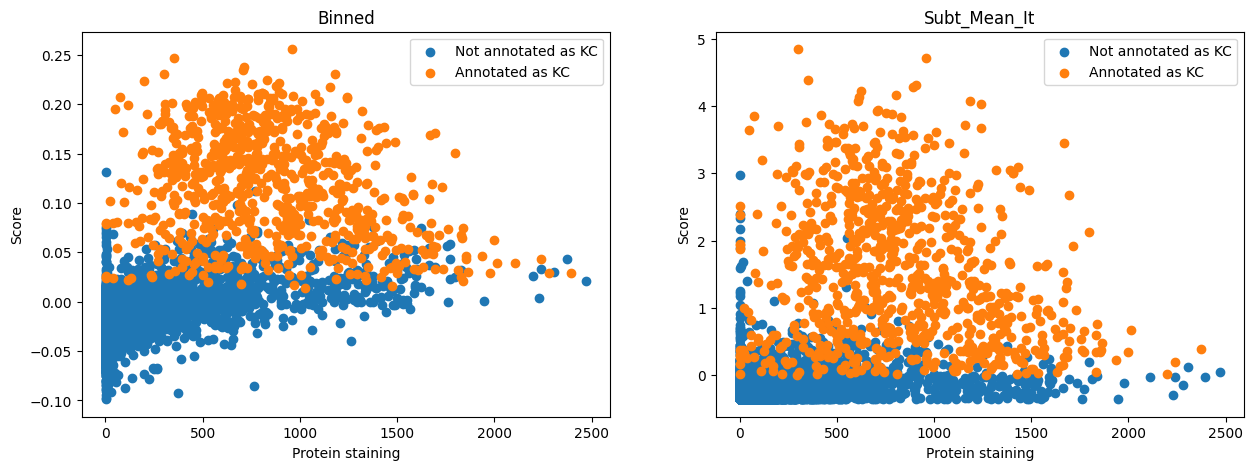

In [61]:
# plot scores in function of protein staining and indicate points with 'Kupf' in anndata.obs['own_score_genes_BasicMartin_12']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[1].scatter(anndata.obs['protein_staining_KC'][(~(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf')).tolist()], scores_subt_mean_it[(~(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf')).tolist()])
ax[1].scatter(anndata.obs['protein_staining_KC'][(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf').tolist()], scores_subt_mean_it[(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf').tolist()])
ax[1].set_title('Subt_Mean_It')
ax[1].set_xlabel('Protein staining')
ax[1].set_ylabel('Score')
ax[1].legend(['Not annotated as KC', 'Annotated as KC'])
ax[0].scatter(anndata.obs['protein_staining_KC'][(~(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf')).tolist()], scores_binned[(~(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf')).tolist()])
ax[0].scatter(anndata.obs['protein_staining_KC'][(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf').tolist()], scores_binned[(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf').tolist()])
ax[0].set_title('Binned')
ax[0].set_xlabel('Protein staining')
ax[0].set_ylabel('Score')
ax[0].legend(['Not annotated as KC', 'Annotated as KC'])

In [46]:
from scipy.stats import pearsonr
correlation_binned = pearsonr(anndata.obs['protein_staining_KC'],scores_binned)[0]
print('Correlation between scores binned and protein staining:')
print(correlation_binned)
correlation_binned_KC_annotated = pearsonr(anndata.obs['protein_staining_KC'][(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf').tolist()],scores_binned_KC_annotated)[0]
print('Correlation between scores binned and protein staining (only KC annotated):')
print(correlation_binned_KC_annotated)
correlation_subt_mean_it = pearsonr(anndata.obs['protein_staining_KC'],scores_subt_mean_it)[0]
print('Correlation between scores subt_mean_it and protein staining:')
print(correlation_subt_mean_it)
correlation_subt_mean_it_KC_annotated = pearsonr(anndata.obs['protein_staining_KC'][(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf').tolist()],scores_subt_mean_it_KC_annotated)[0]
print('Correlation between scores subt_mean_it and protein staining (only KC annotated):')
print(correlation_subt_mean_it_KC_annotated)

Correlation between scores binned and protein staining:
0.5826963940152903
Correlation between scores binned and protein staining (only KC annotated):
-0.2527751861849699
Correlation between scores subt_mean_it and protein staining:
0.5444313659434867
Correlation between scores subt_mean_it and protein staining (only KC annotated):
-0.2166981906859057


In [71]:
# calculate mean protein_staining_KC for KC
protein_staining_KC = anndata.obs['protein_staining_KC']
protein_staining_KC_annotated_subt_mean_it = anndata.obs['protein_staining_KC'][(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf').tolist()]
protein_staining_KC_annotated_binned = anndata.obs['protein_staining_KC'][(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf').tolist()]

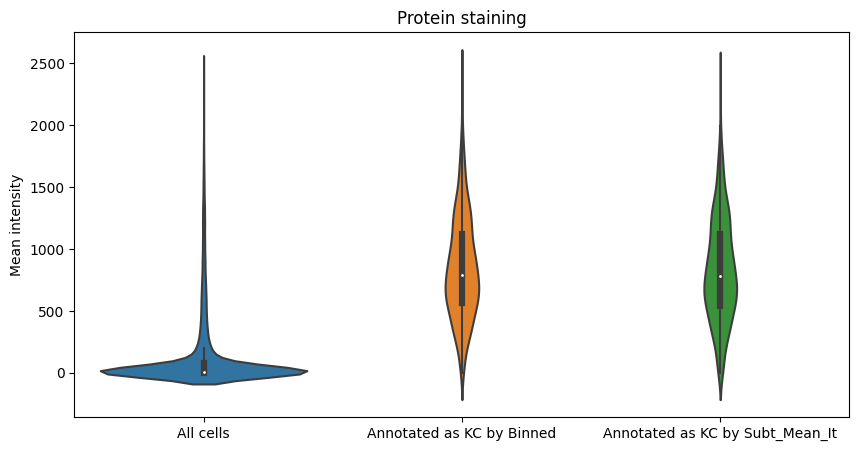

In [72]:
ax = sns.violinplot(data=[protein_staining_KC,protein_staining_KC_annotated_binned, protein_staining_KC_annotated_subt_mean_it])
names = ['All cells','Annotated as KC by Binned','Annotated as KC by Subt_Mean_It']
ax.set(xticklabels=names)
# increase the size of the plot
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Protein staining')
plt.ylabel('Mean intensity')
plt.show()

In [76]:
indices_KC_Subt_mean_it = anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf'
indices_KC_Subt_mean_it = [i for i, x in enumerate(indices_KC_Subt_mean_it) if x]
indices_KC_Binned = anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf'
indices_KC_Binned = [i for i, x in enumerate(indices_KC_Binned) if x]
print('Number of cells annotated as KC by Subt_Mean_It:')
print(len(indices_KC_Subt_mean_it))
print('Number of cells annotated as KC by Binned:')
print(len(indices_KC_Binned))
print('Number of cells annotated as KC by both:')
print(len(set(indices_KC_Subt_mean_it).intersection(indices_KC_Binned)))

Number of cells annotated as KC by Subt_Mean_It:
842
Number of cells annotated as KC by Binned:
788
Number of cells annotated as KC by both:
736
